In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Базовые морфологические операции. Выбрать произвольное
изображение, содержащее дефекты формы 
(внутренние «дырки» или внешние «выступы») объектов. Используя базовые
морфологические операции, полностью убрать или минимизировать дефекты.

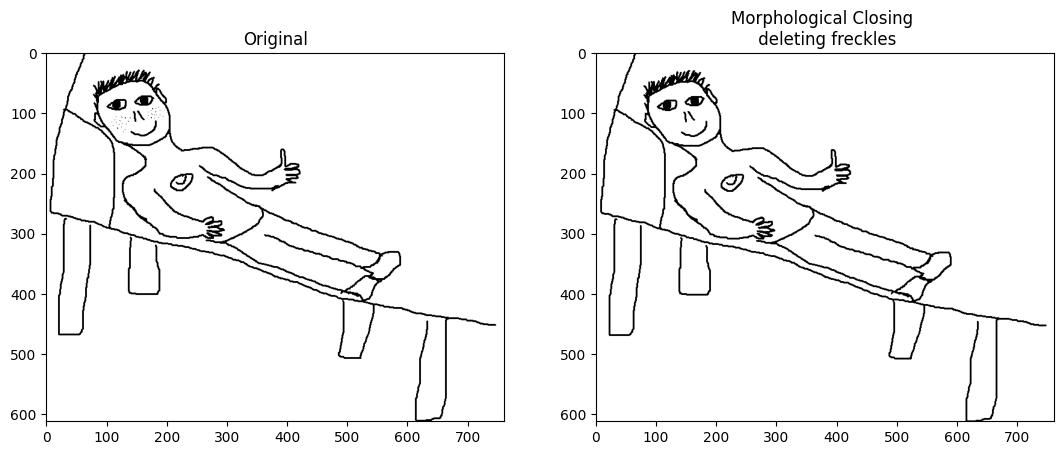

In [104]:
I = cv2.imread('myimage.png', cv2.IMREAD_GRAYSCALE)
_,binary_im = cv2.threshold(I, 127, 255, cv2.THRESH_BINARY)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
image_transform = cv2.morphologyEx(binary_im, cv2.MORPH_CLOSE, kernel)
f, axs = plt.subplots(1,2, figsize=(13,13))
axs[0].imshow(binary_im, cmap='gray')
axs[1].imshow(image_transform, cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('Morphological Closing \n deleting freckles')
plt.show()

2. Разделение объектов. Выбрать произвольное бинарное изображение, 
содержащее перекрывающиеся объекты. 
Использовать операции бинарной морфологии для разделения объектов. 
Выделить контуры объектов

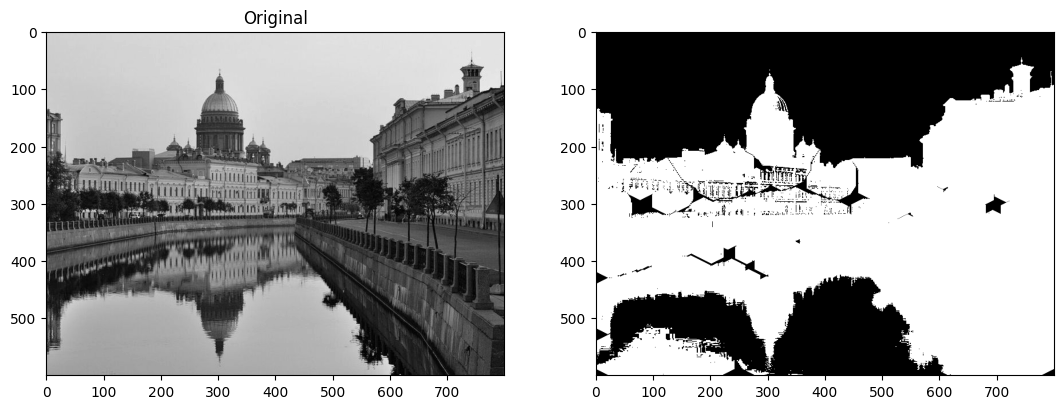

In [115]:
I = cv2.imread("spb_2.jpg",cv2.IMREAD_GRAYSCALE)
ret, Inew = cv2.threshold(I, 160, 255, cv2.THRESH_BINARY_INV)
B = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# Erosion
BW2 = cv2.morphologyEx(Inew, cv2.MORPH_ERODE, B, iterations = 10, borderType = cv2.BORDER_CONSTANT, borderValue = (0))
# Dilation
T = np.zeros_like(Inew)
while cv2.countNonZero(BW2) < BW2.size: 
    D = cv2.dilate(BW2, B, borderType = cv2.BORDER_CONSTANT, borderValue = (0))
    C = cv2.morphologyEx(D, cv2.MORPH_CLOSE, B, borderType = cv2.BORDER_CONSTANT, borderValue = (0))
    S = C - D
    T = cv2.bitwise_or(S, T)
    BW2 = D
# Closing for borders
T = cv2.morphologyEx(T, cv2.MORPH_CLOSE, B, iterations = 10, borderType = cv2.BORDER_CONSTANT, borderValue = (255))
# Remove borders from an image
Inew = cv2.bitwise_and(~T, Inew )
f, axs = plt.subplots(1,2, figsize=(13,13))
axs[0].imshow(I, cmap='gray')
axs[1].imshow(Inew, cmap='gray')
axs[0].set_title('Original')
axs[1].set_title('')
plt.show()


In [7]:
import cv2
import numpy as np

# Загрузка бинарного изображения
image = cv2.imread('im44.jpeg', cv2.IMREAD_GRAYSCALE)

# Бинаризация изображения, если оно еще не бинарное
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)

# Эрозия для разделения объектов
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
eroded = cv2.erode(binary_image, kernel, iterations=3)

# Дилатация для восстановления размера объектов
dilated = cv2.dilate(eroded, kernel, iterations=3)

# Нахождение и отображение контуров
contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contoured_image = cv2.cvtColor(binary_image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)

# Отображение результатов
cv2.imshow('Original Image', binary_image)
cv2.imshow('Separated Objects', dilated)
cv2.imshow('Contours', contoured_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


3. Сегментация. Выбрать произвольное изображение, 
содержащее небольшое число локальных минимумов. 
Выполнить сегментацию изображения по водоразделам.